In [20]:
# Install dependencies

!pip install --upgrade pip

!pip install pandas
!pip install requests
!pip install datetime
!pip install gql

In [88]:
# Import modules
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

In [22]:
# Load trade data
df_trades = pd.read_csv('https://nft-capstone.s3.us-west-1.amazonaws.com/Data_API.csv.gz')

/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3251: DtypeWarning: Columns (0,1,2,4,6,8,9,10,14,15,20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [25]:
pd.set_option('display.max_columns', None)
df_trades.tail(7)

,Smart_contract,ID_token,Transaction_hash,Seller_address,Seller_username,Buyer_address,Buyer_username,Image_url_1,Image_url_2,Image_url_3,Image_url_4,Price_Crypto,Crypto,Price_USD,Name,Description,Collection,Market,Datetime_updated,Datetime_updated_seconds,Permanent_link,Unique_id_collection,Collection_cleaned,Category
6071020,0xf5b0a3efb8e8e4c201e2a935f110eaaf3ffecb8d,237702,0x5410fd51c7d538e110b0e5d845a19d1b0cad9033da9c...,0xac61a6ca9e4266c083c11f6ab87925bd657113da,NaN,0xf1730ba1538cc0934c8b2bc3db630a573d154c9f,NaN,https://lh3.googleusercontent.com/NYNaDSKGA5B1...,https://lh3.googleusercontent.com/lpjsH83fNiAT...,https://lh3.googleusercontent.com/NYNaDSKGA5B1...,https://lh3.googleusercontent.com/NYNaDSKGA5B1...,0.115308,ETH,223.169254,Comfident reptile w Incisor!,"Axies are digital pets, each Axie has its own ...",Axie,OpenSea,2021-04-01 00:00:00,2021-04-01 00:04:49,https://opensea.io/assets/0xf5b0a3efb8e8e4c201...,"('Axie', '237702')",Axie,Games
6071021,0x2a46f2ffd99e19a89476e2f62270e0a35bbf0756,51703,0xd67c640b3ec8c590701796d6e317038c6337e25681d5...,0xc11c20ade395abd5aec1a6040f8ee9b5ffd6b6a6,NaN,0x08b5d278a116665aeecf16e60f87891abbbe492a,NaN,https://lh3.googleusercontent.com/8c75baJSPY0b...,https://ipfsgateway.makersplace.com/ipfs/QmSmu...,https://lh3.googleusercontent.com/8c75baJSPY0b...,https://lh3.googleusercontent.com/8c75baJSPY0b...,1.500000,ETH,2903.122500,F1AT.,RIP USD.,Makersplace,OpenSea,2021-04-01 00:00:00,2021-04-01 00:03:24,https://opensea.io/assets/0x2a46f2ffd99e19a894...,"('Makersplace', '51703')",Maker,Art
6071022,0xb932a70a57673d89f4acffbe830e8ed7f75fb9e0,16412,0x346561b3f7a233c4245f91c68940b2d750df26ef1b04...,0x9f37284b3a538be8eea2d401b595f44c96d39b70,NaN,0xa353401738e7ec6a4db9c0ee4c66eb5252f681c4,NaN,https://lh3.googleusercontent.com/isSUPEsJJWpF...,https://ipfs.pixura.io/ipfs/QmSHxximuHUZV54pAA...,https://lh3.googleusercontent.com/isSUPEsJJWpF...,https://lh3.googleusercontent.com/isSUPEsJJWpF...,0.500000,ETH,967.707500,Pájaro Doctor 13/40,Digital piece made by using a variety of softw...,Superrare,OpenSea,2021-04-01 00:00:00,2021-04-01 00:00:52,https://opensea.io/assets/0xb932a70a57673d89f4...,"('Superrare', '16412')",Superrare,Art
6071023,0x495f947276749ce646f68ac8c248420045cb7b5e,1062274196422536302774639391540663457511117433...,0xd507715bb835252a65d572037ac8eb36854b05ecc672...,0xeada96bf164643bdfe3e657a9f380854694a49dd,Mistcop,0xe2fe53f9bcb33e3e0fc65f2f627ca4eb8e958347,NaN,https://lh3.googleusercontent.com/qdzZDtYHHVdi...,NaN,https://lh3.googleusercontent.com/qdzZDtYHHVdi...,https://lh3.googleusercontent.com/qdzZDtYHHVdi...,0.050000,ETH,96.770750,Kawaii Monster #2,NaN,Kawaii-monsters,OpenSea,2021-04-01 00:00:00,2021-04-01 00:00:50,https://opensea.io/assets/0x495f947276749ce646...,"('Kawaii-monsters', '1062274196422536302774639...",Kawaiimonster,Other
6071024,0x495f947276749ce646f68ac8c248420045cb7b5e,4602588071276327231659212203812866312085457052...,0x4cb90a775619a9483c003050de47c403fae957e5352b...,0x65c1b9ae4e4d8dcccfd3dc41b940840fe8570f2a,International_Megadigital,0x220d20310f52d97e353028ebd742d2c690eaf0a1,WanderlustNFT,https://lh3.googleusercontent.com/SoTAV8k4UC90...,NaN,https://lh3.googleusercontent.com/SoTAV8k4UC90...,https://lh3.googleusercontent.com/SoTAV8k4UC90...,0.018500,ETH,35.805177,Bishoujo Originals - #4977,The original source for collectible Bishoujo h...,Moe-tokens,OpenSea,2021-04-01 00:00:00,2021-04-01 00:00:51,https://opensea.io/assets/0x495f947276749ce646...,"('Moe-tokens', '460258807127632723165921220381...",Moetoken,Other
6071025,0x495f947276749ce646f68ac8c248420045cb7b5e,8060875342503467325201444233539848397816312727...,0x76068e84592753bb1e076c5320c7e3ecfe41e4da8ebe...,0xb236f00808a9f88b3117af95c881966288dfbcbb,TheOfficialGarrett,0xd543a0be0684f0556786586b83f4c9fd16a4dc35,kittylord,https://lh3.googleusercontent.com/AWwjq0cuTjHF...,NaN,https://lh3.googleusercontent.com/AWwjq0cuTjHF...,https://lh3.googleusercontent.com/AWwjq0cuTjHF...,0.010000,ETH,19.354150,Smile 0066,Coming to yo

Summary of columns:

* **Smart_contract**: string, Smart contract of the given NFT
* **Unique_id_collection**: string, Unique ID for a given NFT
* **Price_Crypto, Crypto, Price_USD**: np.float64, Conversion in USD is done with a daily resolution
* **Seller_address, Seller_username, Buyer_address, Buyer_username**: strings, Addresses for sellers and buyers and (when available) their username used on the NFT marketplace
* **Image_url_1, Image_url_2, Image_url_3, Image_url_4**: strings, Url to the digital object associate with the NFT. Given that urls may change over time, first try to download Image_url_1, then Image_url_2, and so on..
* **Datetime_updated, Datetime_updated_seconds**: string, It identifies the time of the transaction with either a day or second resolution
* **ID_token**: string, ID of the NFT asset within a given smart contract
* **Transaction_hash**: string, hash of the transaction involving a NFT sale
* **Collection**: string, It corresponds to the collection in which the NFT belongs to
* **Collection_cleaned**: string, It removes common mispellings in the field Collection. It also uses words in Cleaning_collections.csv to smooth the names. For instance, Aavegotchi renames all collections starting with that string in Aavegotchi. Some unnamed collections are here called Miscellanea
* **Market**: It is where data are downloaded from (so the API).
* **Name**: string, Title of the NFT listing
* **Description**: string, Description of the NFT listings
* **Permanent_link**: string, A link that allows to verify the NFT authenticity (valid only for the OpenSea Market)
* **Category**: string, Category in which the NFT belongs to. Examples are: Art, Games, and Collectible

In [89]:
type(df_trades.tail(1)['Unique_id_collection'].values[0])

str

Ideas for EDA:
* Distributions of USD Price
* Collection: convert to some number representation
* Split up unique id dataset
* Collection vs Collection cleaned
* Examine the different categories
* What percentage of dataset is ETH
* Should we one hot encode all of the categorical variables?

In [ ]:
# Number of unique NFTs in dataset
df_trades

In [44]:
df_trades['Price_USD'].describe()

count    6.062744e+06
mean     1.463413e+02
std      5.488389e+03
min      1.514250e-16
25%      2.277600e-01
50%      1.426470e+00
75%      1.385100e+01
max      7.501893e+06
Name: Price_USD, dtype: float64

In [54]:
df_trades['Price_USD'].quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95])

0.10      0.076950
0.20      0.154632
0.30      0.346450
0.40      0.723180
0.50      1.426470
0.60      3.317250
0.70      8.325456
0.80     23.876820
0.90     83.023239
0.95    247.355625
Name: Price_USD, dtype: float64

In [68]:
collections_unique = df_trades['Collection'].nunique()
cleaned_collections_unique = df_trades['Collection_cleaned'].nunique()
print('There are', collections_unique, 'unique collection entries and', cleaned_collections_unique, 'unique cleaned collection entries')

There are 6283 unique collection entries and 4624 unique cleaned collection entries


(array([2643014.,       0., 1472515.,       0.,  272772.,       0.,
        1605657.,       0.,   68372.,    8697.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

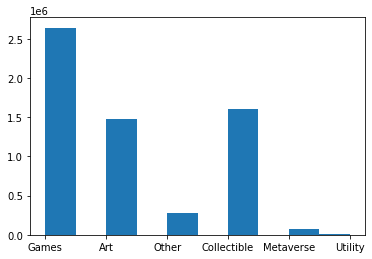

In [62]:
plt.hist(df_trades["Category"])

In [76]:
# Get an idea of the different exchanges NFT data are traded on

df_trades['Market'].value_counts()

Atomic           3185292
OpenSea          1907262
Cryptokitties     725400
Godsunchained     236210
Decentraland       16863
Name: Market, dtype: int64

(array([ 236210.,       0.,  725400.,       0.,       0., 3185292.,
              0.,   16863.,       0., 1907262.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

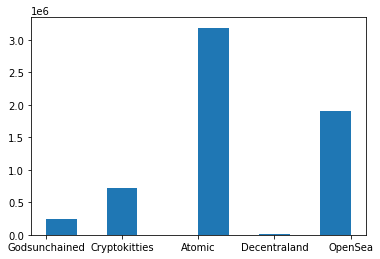

In [77]:
plt.hist(df_trades['Market'])

In [81]:
# For each market, what are the different cryptos used in that market

for market in df_trades['Market'].unique():
    print(market)
    print(df_trades[df_trades['Market'] == market]['Crypto'].value_counts())

Godsunchained
ETH    236210
Name: Crypto, dtype: int64
Cryptokitties
ETH    725400
Name: Crypto, dtype: int64
Atomic
WAX    3185292
Name: Crypto, dtype: int64
Decentraland
MANA    16863
Name: Crypto, dtype: int64
OpenSea
ETH      1443615
WETH      436355
MANA       12776
DAI         2141
USDC        1491
          ...   
eFAME          1
LAR            1
PXART          1
THREE          1
PIXIE          1
Name: Crypto, Length: 159, dtype: int64


In [84]:
# Count of na's in dataset

# Biggest questions from this:
# 1. Why some missing Price_USD?
# 2. Why some missing transaction hash?

df_trades.isna().sum()

Smart_contract               961610
ID_token                          0
Transaction_hash            3185640
Seller_address                    0
Seller_username             4977773
Buyer_address                     0
Buyer_username              5178164
Image_url_1                   54798
Image_url_2                 1122022
Image_url_3                 1032330
Image_url_4                 1036942
Price_Crypto                      0
Crypto                            0
Price_USD                      8283
Name                        4219063
Description                 4340298
Collection                        0
Market                            0
Datetime_updated                  0
Datetime_updated_seconds          0
Permanent_link              4163765
Unique_id_collection              0
Collection_cleaned                0
Category                          0
dtype: int64

In [90]:
print(df_trades[df_trades['Price_USD'].isna()]['Market'].value_counts())
# Small percentage, do we just ignore?

OpenSea          7935
Cryptokitties     348
Name: Market, dtype: int64


In [ ]:
from scipy.stats import f_oneway

CategoryGroupLists=df_trades.groupby('Unique_id_collection')['Price_USD'].apply(list)
 
# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value &gt; 0.05
#AnovaResults = f_oneway(*CategoryGroupLists)
#print('P-Value for Anova is: ', AnovaResults[1])
CategoryGroupLists
